# Milestone 5- Final Project Paper and Presentation
Stewart Wilson

In [319]:
# libraries used
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.features import Rank1D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier
import warnings

In [320]:
warnings.filterwarnings('ignore')

## (Prior Work) Milestone 3- Preliminary Findings

In [321]:
# read in data
machine_df = pd.read_csv("ai4i2020.csv")

In [322]:
machine_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


## Structure of the Data


In [323]:
machine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

No null values

In [324]:
machine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


## Histogram of Variables


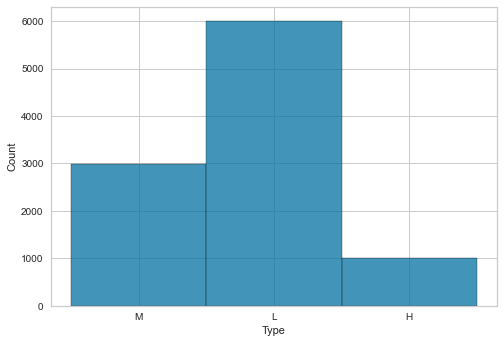

In [325]:
sns.histplot(data=machine_df, x="Type")
plt.show()

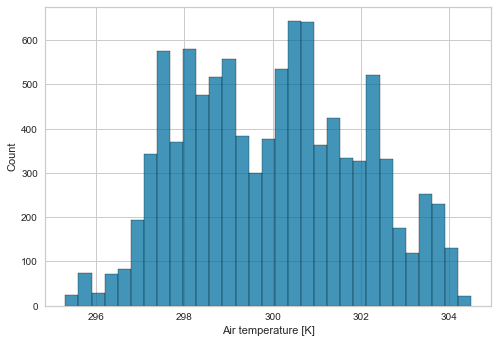

In [326]:
# Air Temp
sns.histplot(data=machine_df, x="Air temperature [K]")
plt.show()

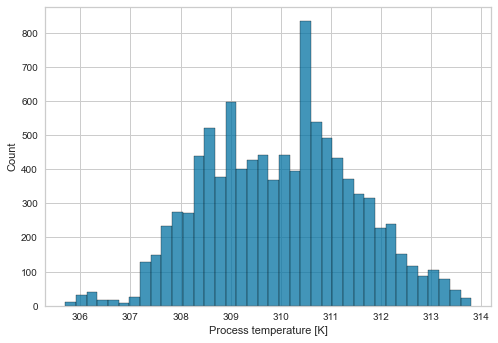

In [327]:
# process temp
sns.histplot(data=machine_df, x="Process temperature [K]")
plt.show()

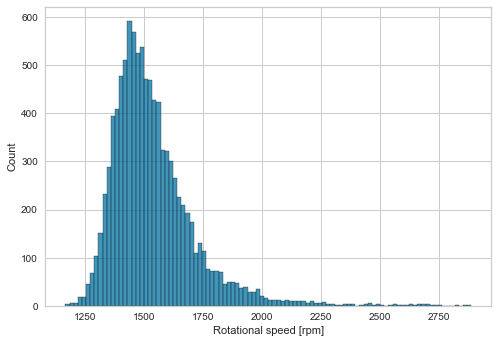

In [328]:
sns.histplot(data=machine_df, x="Rotational speed [rpm]")
plt.show()

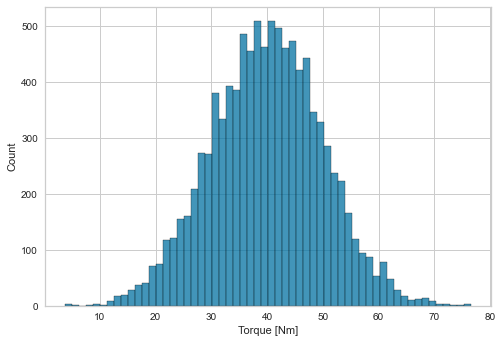

In [329]:
sns.histplot(data=machine_df, x="Torque [Nm]")
plt.show()

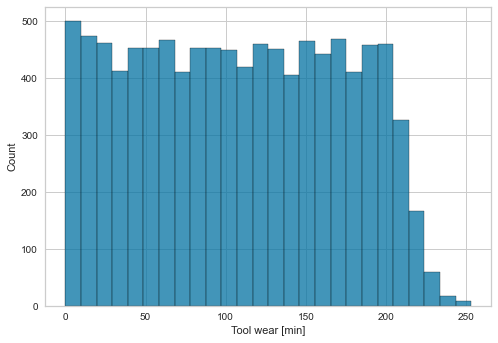

In [330]:
sns.histplot(data=machine_df, x="Tool wear [min]")
plt.show()

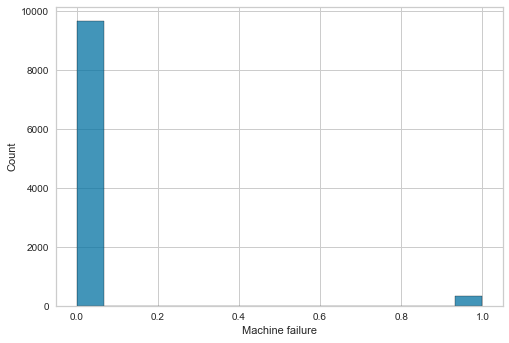

In [331]:
sns.histplot(data=machine_df, x="Machine failure")
plt.show()

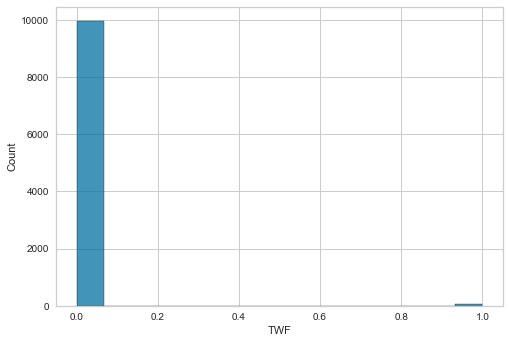

In [332]:
sns.histplot(data=machine_df, x="TWF")
plt.show()

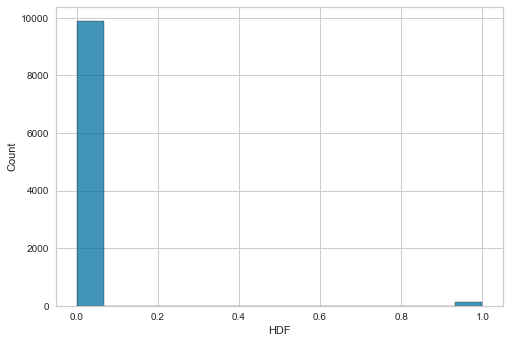

In [333]:
sns.histplot(data=machine_df, x="HDF")
plt.show()

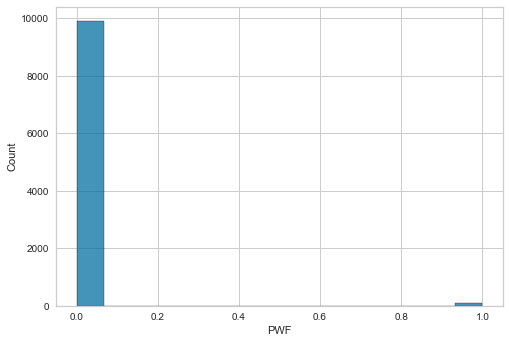

In [334]:
sns.histplot(data=machine_df, x="PWF")
plt.show()

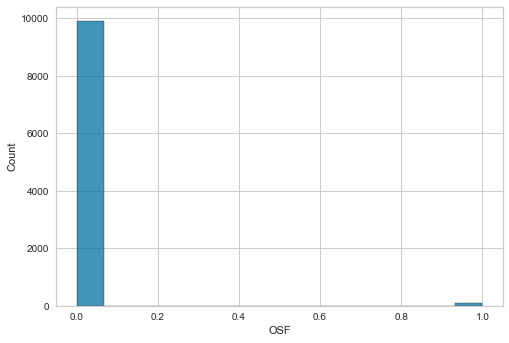

In [335]:
sns.histplot(data=machine_df, x="OSF")
plt.show()

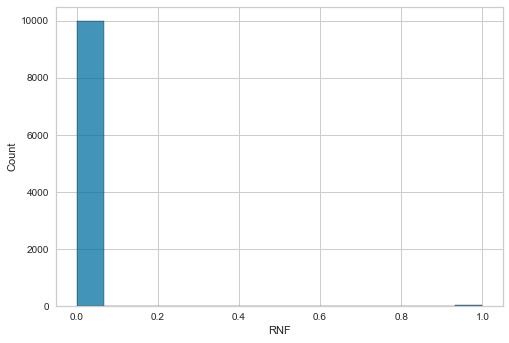

In [336]:
sns.histplot(data=machine_df, x="RNF")
plt.show()

Mostly normal distributions for features. process temp and air temp have bimodal distribution. should investigate to see if it's outliers or truly bimodal. rotational speed has positive skew that may need to be corrected and tool wear is uniformly distributed. For target variables, the failure rate is not balanced. This makes the case for using a random forest model stronger but does mean that we may mean may need to change our evaluation metric to one which judges on all four categories rather than just correct/incorrect options.

## Scatterplots of Features & Target

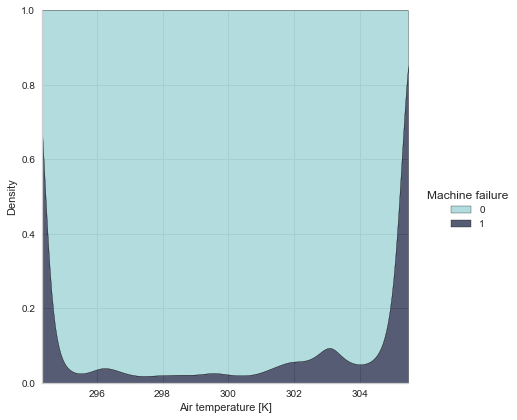

In [337]:
sns.displot(
    data=machine_df,
    x="Air temperature [K]", hue="Machine failure",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.show()

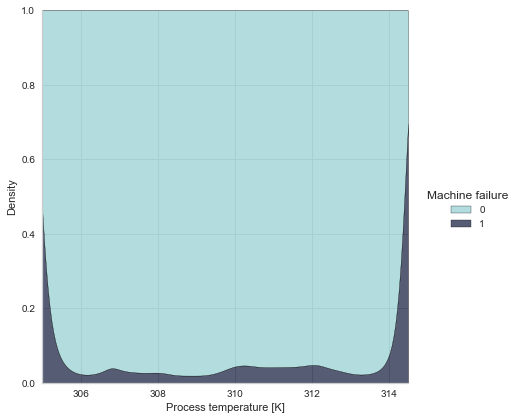

In [338]:
sns.displot(
    data=machine_df,
    x="Process temperature [K]", hue="Machine failure",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.show()

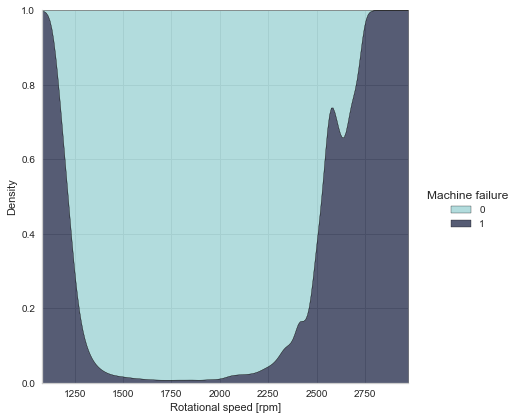

In [339]:
sns.displot(
    data=machine_df,
    x="Rotational speed [rpm]", hue="Machine failure",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.show()

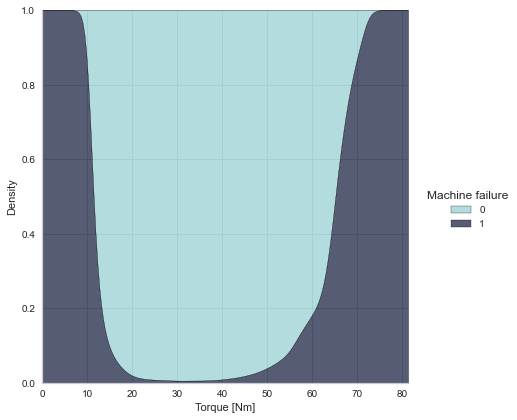

In [340]:
sns.displot(
    data=machine_df,
    x="Torque [Nm]", hue="Machine failure",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.show()

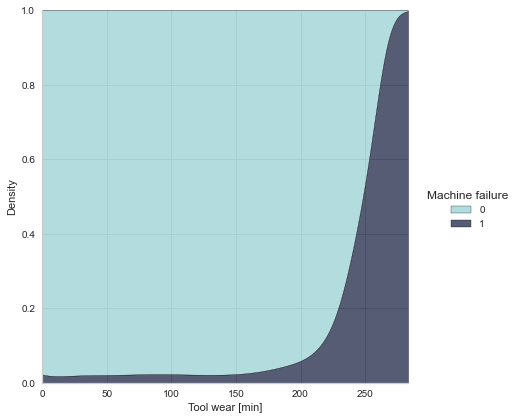

In [341]:
sns.displot(
    data=machine_df,
    x="Tool wear [min]", hue="Machine failure",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.show()

The temperature features did not seem to have a huge relationship with machine failure except at the very extremes. Torque, tool wear, and rotational speed all had a more meaningful relationship, with rotational speed and torque having the greatest relationship. In all cases, the relation showed most clearly at the extremes of any given feature. 

## Correlation Analysis of Features and Targets
Next going to look at how all the variables relate to one another. Going to do a correlation matrix

In [342]:
subset = machine_df[["Type", 	"Air temperature [K]", "Process temperature [K]",	"Rotational speed [rpm]", 	"Torque [Nm]",	"Tool wear [min]",	"Machine failure"]]

In [343]:
corr_matrix = subset.corr(method="pearson")

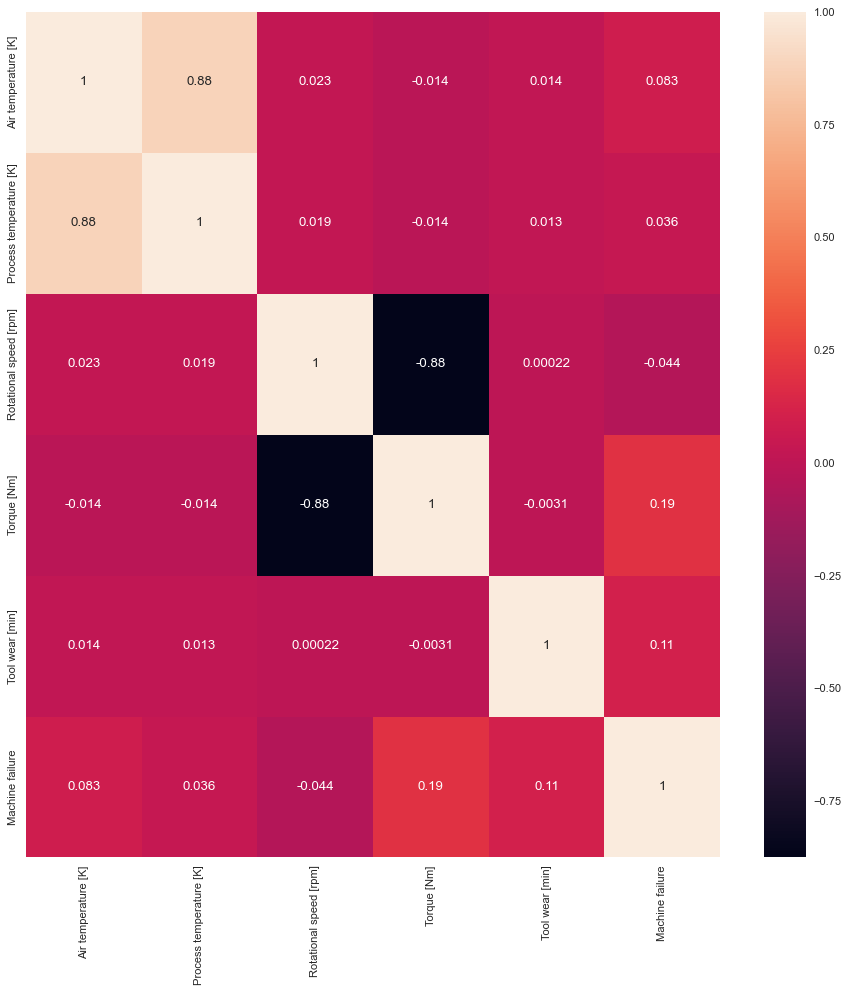

In [344]:
plt.figure(figsize=(14, 14), dpi=80)
sns.heatmap(corr_matrix, annot=True)
plt.show()

Highest correlation w/ machine failure for feature variables are: torque (.19), toolwear (.11), and air temperature (.083). Torque and rotational speed are highly correlated with one another, as are process temperature and air temperature. This intuitively makes sense, and should suggest that when building our model to take only one of those as a feature so we can maintain the assumption of no multicollinearity.

In [345]:
# explode the type category
dummies = pd.get_dummies(machine_df["Type"])
dummies

,H,L,M
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,1,0,0
9997,0,0,1
9998,1,0,0


In [346]:
subset2 = pd.concat([machine_df, dummies], axis=1)
subset2

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,0,0,1
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,1,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,0,0,1
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,1,0,0


In [347]:
corr_matrix2 = subset2.corr(method="pearson")

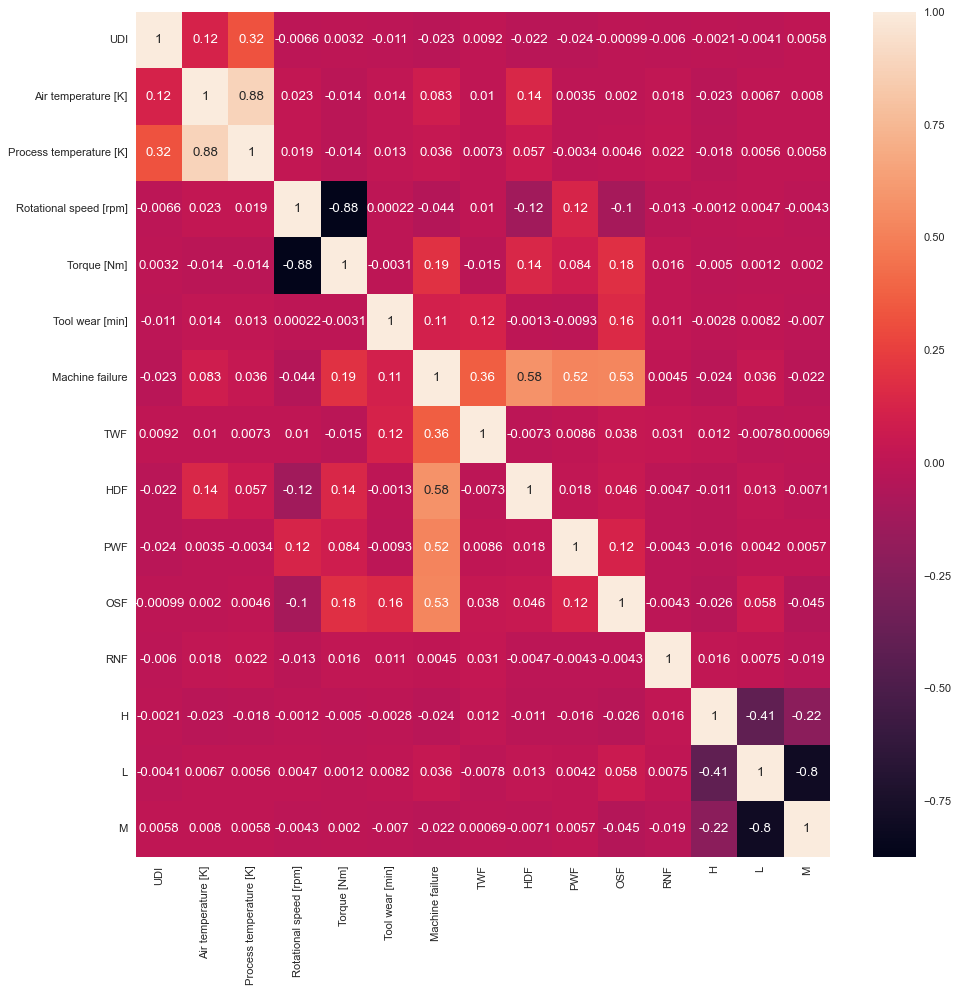

In [348]:
plt.figure(figsize=(14, 14), dpi=80)
sns.heatmap(corr_matrix2, annot=True)
plt.show()

Didn't have much effect honestly.

## Learn More About Target Variable

In [349]:
machine_df["Machine failure"].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [350]:
machine_df["TWF"].value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [351]:
machine_df["HDF"].value_counts()

0    9885
1     115
Name: HDF, dtype: int64

In [352]:
machine_df["PWF"].value_counts()

0    9905
1      95
Name: PWF, dtype: int64

In [353]:
machine_df["OSF"].value_counts()

0    9902
1      98
Name: OSF, dtype: int64

In [354]:
machine_df["RNF"].value_counts()

0    9981
1      19
Name: RNF, dtype: int64

In [355]:
sum([val for i, val in machine_df["TWF"].iteritems() if machine_df["OSF"][i] == val])

3

In [356]:
sum([val for i, val in machine_df["TWF"].iteritems() if machine_df["RNF"][i] == val])

1

In [357]:
sum([val for i, val in machine_df["TWF"].iteritems() if machine_df["PWF"][i] == val])

1

In [358]:
sum([val for i, val in machine_df["TWF"].iteritems() if machine_df["HDF"][i] == val])

0

34 cases of overlap in the types of machine failure, meaning that if we want to train a model to predict the specific type of failure, we will need to create derived variables for those possible combinations of failures!

In [359]:
visualizer = Rank1D(algorithm='shapiro')

In [360]:
features = subset2[["Air temperature [K]", "Process temperature [K]",	"Rotational speed [rpm]", 	"Torque [Nm]",	"Tool wear [min]"]]
target = subset2["Machine failure"]

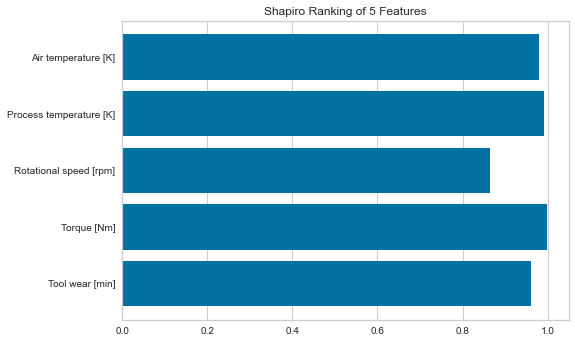

In [361]:
visualizer.fit(features, target)
visualizer.transform(features)
visualizer.show()
plt.show()

## Milestone 4- Finalizing Your Results

### Data Preparation

In [362]:
# drop unneeded columns
machine_df = machine_df.drop(["UDI", "Product ID", "Type"], axis=1)

In [363]:
machine_df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [364]:
# create features and targets data subsets
features = machine_df[["Air temperature [K]", "Process temperature [K]",	"Rotational speed [rpm]", 	"Torque [Nm]",	"Tool wear [min]"]]
target = machine_df["Machine failure"]

In [365]:
# split into training and test sets
feat_train, feat_test, target_train, target_test = train_test_split(features, target, test_size=.1, random_state=42)

### Building Random Forest Model

In [366]:
# creat random forest classifier object
random_forest1 = RandomForestClassifier(random_state=1, n_jobs=-1)

In [367]:
# train model
model1 = random_forest1.fit(feat_train, target_train)

In [368]:
# make predictions
predictions1 = model1.predict(feat_test)

#### Evaluating Model

In [369]:
def eval_model(y_true, y_pred):
    """
    evaluates model with f1 score, matthews correlation coefficient, and confusion matrix
    """
    f1 = f1_score(y_true, y_pred)
    matt_coef = matthews_corrcoef(y_true, y_pred)
    conf_mat = confusion_matrix(y_true, y_pred)
    
    print(f"F1 Score: {f1}")
    print(f"Matthews Correlation Coefficient: {matt_coef}")
    print(f"Confusion Matrix: \n{conf_mat}")
    ConfusionMatrixDisplay(conf_mat).plot()
    plt.grid(False)
    plt.show()

F1 Score: 0.7142857142857142
Matthews Correlation Coefficient: 0.7104790900780139
Confusion Matrix: 
[[964   5]
 [ 11  20]]


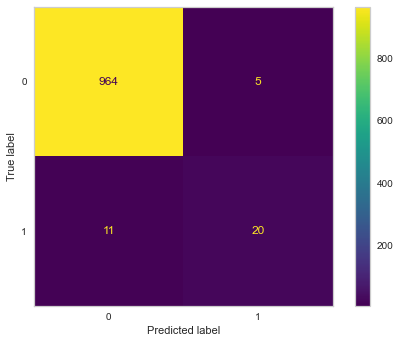

In [370]:
# evaluate model
eval_model(target_test, predictions1)

#### Assessing the Initial Model

Surprisingly, the first model performed well. With a 71.42% F1 score, the model performed reasonably well at predicitng the classes, despite how imbalanced they are. The rate of predicting a machine not failing was clearly higher than the rate of predicting if a machine would fail. Now, we will engage in hyperparameter tuning, as well as anticipating the imbalanced classes to see if it can improve our model.

#### Tuning the Random Forest Model

In [371]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [372]:
# create new random forest classifier for hyper paramter tuning.
rf = RandomForestClassifier()

In [373]:
# randomized grid search
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [374]:
rf_random.fit(feat_train, target_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [375]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

Now we will fit a new model using these best parameters from our random search.

In [376]:
# tuned forest model
random_forest2 = RandomForestClassifier(n_estimators= 200,
                                         min_samples_split= 5,
                                         min_samples_leaf= 2,
                                         max_depth= 90,
                                         bootstrap= False,
                                         max_features='sqrt',
                                         class_weight='balanced',
                                         n_jobs=-1)

In [377]:
# fit model
model2 = random_forest2.fit(feat_train, target_train)

In [378]:
# predict
predictions2 = model2.predict(feat_test)

F1 Score: 0.7333333333333333
Matthews Correlation Coefficient: 0.7255238410741319
Confusion Matrix: 
[[962   7]
 [  9  22]]


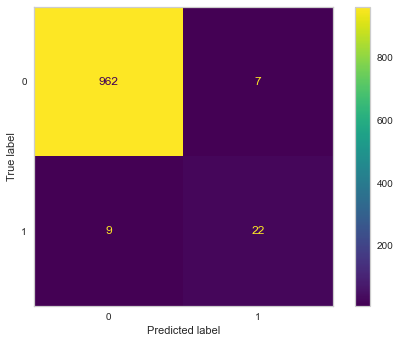

In [379]:
# eval model
eval_model(target_test, predictions2)

##### Assess

Tuning the model with a random search brought a moderate improvement to our model. The F1 score increased by 2% and Matthew's coefficient by 1%. To continue tuning, we will use a grid search that narrows in on the paramters that the random search provided.

#### Grid Search Tuning

In [380]:
# create param grid
param_grid={
    'bootstrap':[False],
    'max_depth':[80, 90, 100, 110],
    'max_features':['sqrt'],
    'min_samples_split': [3, 5, 7],
    'n_estimators':[100, 200, 300, 1000],
    'min_samples_leaf': [1,2,3]
}

In [381]:
# new model for grid tuning
rf2= RandomForestClassifier()

In [382]:
# initiate grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [383]:
# fit grid search
grid_search.fit(feat_train, target_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [80, 90, 100, 110],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [384]:
# look at best params
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [385]:
# create model with best params
random_forest3 = RandomForestClassifier(n_estimators= 300,
                                         min_samples_split= 5,
                                         min_samples_leaf= 2,
                                         max_depth= 90,
                                         bootstrap= False,
                                         max_features='sqrt',
                                         class_weight='balanced',
                                         n_jobs=-1)

In [386]:
# fit model
model3 = random_forest3.fit(feat_train, target_train)

In [387]:
# predict w/ model
predictions3 = model3.predict(feat_test)

F1 Score: 0.7333333333333333
Matthews Correlation Coefficient: 0.7255238410741319
Confusion Matrix: 
[[962   7]
 [  9  22]]


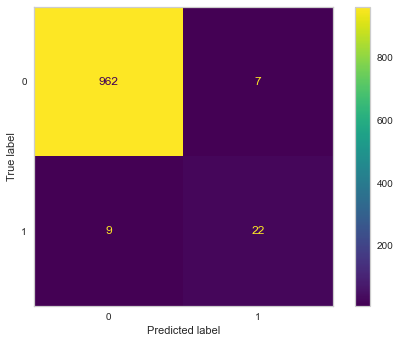

In [388]:
# eval model
eval_model(target_test, predictions3)

And as a final evaluation, I will do a cross-validation on the model to validate the model to help ensure the model is generalizable enough to perform well on unseen data.

In [389]:
print(np.mean(cross_val_score(random_forest3, feat_train, target_train, cv=10)))

0.9807777777777777


### Multiclass Predictor

In [390]:
def eval_multi_model(y_true, y_pred):
    """
    evaluates model with f1 score, matthews correlation coefficient, and confusion matrix
    """
    f1 = f1_score(y_true, y_pred, average="weighted")
    matt_coef = matthews_corrcoef(y_true, y_pred)
    conf_mat = confusion_matrix(y_true, y_pred)
    
    print(f"F1 Score: {f1}")
    print(f"Matthews Coefficient: {matt_coef}")
    print(f"Confusion Matrix: \n{conf_mat}")
    ConfusionMatrixDisplay(conf_mat).plot()
    plt.grid(False)
    plt.show()

In [391]:
machine_df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [392]:
machine_multi = machine_df

In [393]:
# make multi class indicator variable
machine_multi['Machine failure']=0
machine_multi['Machine failure'][machine_multi['TWF']==1]=1
machine_multi['Machine failure'][machine_multi['HDF']==1]=2
machine_multi['Machine failure'][machine_multi['PWF']==1]=3
machine_multi['Machine failure'][machine_multi['OSF']==1]=4
machine_multi['Machine failure'][machine_multi['RNF']==1]=5

In [394]:
machine_multi.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

In [395]:
# split into feat and target
X = machine_multi.iloc[:,:-1]
y = machine_multi.iloc[:,-1]

In [396]:
# split into test and train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=3, stratify=y)

In [397]:
# build neural network
network = MLPClassifier(random_state=1, max_iter=600, learning_rate = "invscaling").fit(x_train, y_train)

In [398]:
preds = network.predict(x_test)

F1 Score: 0.9565007215007216
Matthews Coefficient: 0.3712696153080848
Confusion Matrix: 
[[1922    0    0    0    8    0]
 [   8    0    0    0    0    0]
 [  21    0    0    0    0    0]
 [  16    0    0    0    1    0]
 [   5    0    0    0   15    0]
 [   4    0    0    0    0    0]]


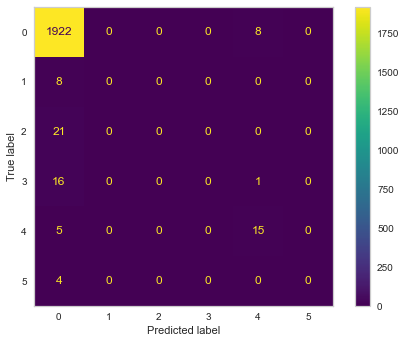

In [399]:
# evaluate network
eval_multi_model(y_test, preds)

## References

Abbott, Dean. *Applied Predictive Analytics: Principles and Techniques for the Professional Data Analyst*. Indianapolis, IN: Wiley, 2014. 

Albon, Chris. *Machine Learning with Python Cookbook: Practical Solutions from Preprocessing to Deep Learning*. Sebastopol, CA: O'Reilly, 2020. 

Altini, Marco. “Dealing with Imbalanced Data: Undersampling, Oversampling and Proper Cross-Validation.” Marco Altini, 2015. https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation. 

Brownlee, Jason. “Step-by-Step Framework for Imbalanced Classification Projects.” MachineLearningMastery.com, March 18, 2020. https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/. 

Chelaru-Centea, Nancy. “Conditional Probability Density Plots.” Nextjournal. Accessed January 22, 2023. https://nextjournal.com/eda/conditional-probability-density-plots. 

Chicco, Davide, and Giuseppe Jurman. “The Advantages of the Matthews Correlation Coefficient (MCC) over F1 Score and Accuracy in Binary Classification Evaluation - BMC Genomics.” BioMed Central. BioMed Central, January 2, 2020. https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7. 

S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), 2020, pp. 69-74, doi: 10.1109/AI4I49448.2020.00023. Predictive Maintenance Dataset (AI4I 2020)

“Equipment Failure Is Costly for Manufacturers.” ASSEMBLY RSS. ASSEMBLY, August 6, 2021. https://www.assemblymag.com/articles/96518-equipment-failure-is-costly-for-manufacturers. 


